In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

In [2]:
#Importing lemmatizer, string and stopwords 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#Dataset
news = pd.read_csv("train.csv")

In [4]:
news.head(1)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1


In [5]:
# news.drop("length", axis=1, inplace=True)

In [6]:
news.head(1)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1


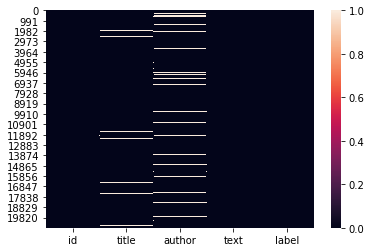

In [7]:
sns.heatmap(news.isnull())

In [8]:
#Getting rid of the null values
news = news.dropna()

In [9]:
# Resetting the index to adjust with the dropped values
news.reset_index(inplace=True)

In [10]:
news.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


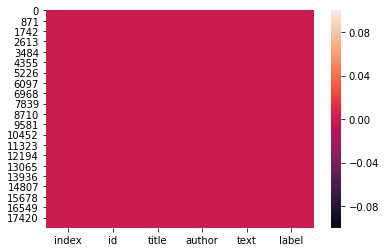

In [11]:
# Checking if there's any null value left
sns.heatmap(news.isnull())

In [12]:
news.shape

(18285, 6)

In [13]:
X = news.drop("label",axis=1)
y= news["label"]

In [14]:
X.shape

(18285, 5)

In [15]:
y.shape

(18285,)

In [16]:
# It's time to CLean the data
import re
corpus= []
for i in range(0,len(news)):

    temp = re.sub('[^a-zA-Z]'," ", news["title"][i])
    temp = temp.lower()
    temp = temp.split()
    temp = [lm.lemmatize(word) for word in temp if not word in stopwords.words("english")]
    temp = " ".join(temp)

    corpus.append(temp)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [18]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [19]:
cv = CountVectorizer()
X = cv.fit_transform(corpus)
y = pd.get_dummies(news['label'],drop_first=True)
print(cv.get_feature_names())
X = X.toarray()

['aa', 'aaa', 'aap', 'aaron', 'ab', 'abandon', 'abandonados', 'abandoned', 'abandoning', 'abbas', 'abbott', 'abby', 'abc', 'abd', 'abdel', 'abdeslam', 'abdicate', 'abducted', 'abducting', 'abduction', 'abducts', 'abdul', 'abe', 'abedi', 'abedin', 'abellera', 'aber', 'abgelegenen', 'abgesprochen', 'abhorrent', 'ability', 'able', 'aboard', 'abolish', 'abolition', 'aboriginal', 'abort', 'aborted', 'abortion', 'abound', 'abramovi', 'abrams', 'abramson', 'abran', 'abridged', 'abroad', 'abrogation', 'abrupt', 'abruptly', 'absence', 'absent', 'absentee', 'absichtlich', 'absolute', 'absolutely', 'absoluter', 'absorbed', 'abstaining', 'abstains', 'absurd', 'absurdly', 'abu', 'abuse', 'abused', 'abuser', 'abusing', 'abyss', 'aca', 'acaba', 'academia', 'academic', 'academy', 'acc', 'accelerate', 'accelerates', 'accelerating', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessed', 'accident', 'accidental', 'accidentally', 'acclaim', 'accommodating

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
pipeline = Pipeline([
    ('tfidf',TfidfTransformer()),
    ('nm', MultinomialNB())
])

In [22]:
pipeline.fit(X_train,y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('nm',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [23]:
pred = pipeline.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[2990   64]
 [ 828 1604]]


              precision    recall  f1-score   support

           0       0.78      0.98      0.87      3054
           1       0.96      0.66      0.78      2432

    accuracy                           0.84      5486
   macro avg       0.87      0.82      0.83      5486
weighted avg       0.86      0.84      0.83      5486

